# REGRESION LOGISTICA o funcion sigmoide
* Clasificacion de elements con naturaleza dicotomica (solo hay dos clases posibles)
* Es de los mas usados para clasificar elementos binarios
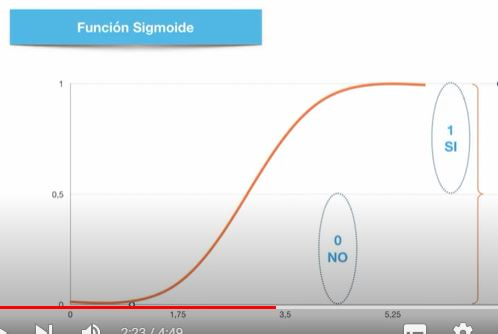

## Tipos de regresiones Logisticas
* Binaria: Tiene unicamente DOS resultados posibles
* Multinomial: Tiene 3 o mas categorias nominales (clasificar la marca de una moto)
* Ordinal: Clasifica con 3 o mas categorias ordinales (clasificar un restaurante de 1 a 5)



# PROGRAMANDO EL ALGORITMO

### El ejercicio corresponde a predecir si una persona tiene un tumor maligno (1) o benigno (0)

In [1]:
# iMPORTAMOS EL DATASET
from sklearn import datasets

dataset = datasets.load_breast_cancer()

In [2]:
dataset.keys() #muestra las llaves para conocer el dataset
print(dataset.DESCR) #Muestra la descripcion del dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Definiendo X y Y

In [3]:
x_data = dataset.data #Se presentan todos los datos el dataset. Mas de 1D
y_data = dataset.target

## Separando datos de prueba y de test

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2) #0.2 es la proporcion de division

### Escalando Datos 
#### Los datos se escalan ya que estan en dimensiones diferentes con escalas de valor en diferentes rangos

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
escalar = StandardScaler()

In [8]:
x_train = escalar.fit_transform(x_train) #Obtiene la media y la varianza para el modelo para luego transformalos
x_test = escalar.transform(x_test) #Como ya se obtuvo la media y la varianza en el paso anterior, aca solo se transforman


## Entrenando el Modelo

In [9]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [10]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

## Realizando una prediccion

In [11]:
y_predict = algoritmo.predict(x_test)

## Metricas de rendimiento

#### MATRIZ DE CONFUSION

In [12]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_predict)

#Matriz de confusion
#print("[VN, FP]") #Verdaderos positivos, falsos negativos
#print("[FN, VP]") #falsos positivos, verdaderos negativos

In [13]:
matriz #Analizamos que hay 41 verdaderos positivos y 70 verdaderos negativos

array([[38,  3],
       [ 1, 72]], dtype=int64)

### Precision del modelo
Datos positivos respecto a los verdaderos que pronostico la maquina

In [14]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.96

### Exactitud del modelo
Casos POSITIVOS Y NEGATIVOS predichos correctamente por la maquina

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9649122807017544

### Sensibilidad del Modelo
Verdaderos Positivos sobre el total de positivos el la vida real

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.9863013698630136

### Puntaje F1
Combinacion armonica entre la presicion y la sensibilidad

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9729729729729729

### Calculo de la curva ROC-AUC

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict)

0.9565653190778483